# Result analysis 

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import trimesh 
from mpl_toolkits.mplot3d import Axes3D

In [151]:
dataDir = "/Users/zuozhu/Git/RPC_results/exp1/test_results/"

In [152]:
sample = np.load(dataDir + 'samples_220.npy')
sample.shape

(50, 3, 2048)

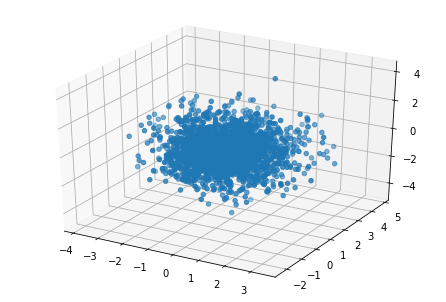

In [156]:
idx = 30
x = sample[idx,0,:]
y = sample[idx,1,:]
z = sample[idx,2,:]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z )
plt.show()

In [45]:
orignal_data = "/Users/zuozhu/Git/ResFlowPC/data/ShapeNetCore.v2.PC15k/02691156/train/"

In [47]:
ori_sample = np.load(orignal_data + '1a04e3eab45ca15dd86060f189eb133.npy')
ori_sample.shape

(15000, 3)

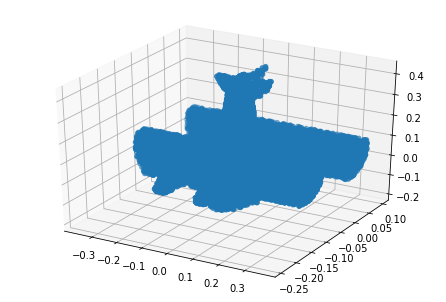

In [80]:
x = ori_sample[:,0]
y = ori_sample[:,1]
z = ori_sample[:,2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z )
plt.show()

In [112]:
print(x.mean())

0.033490784


In [79]:
print(sample.min())

-5.2203803


In [175]:
import torch 
m = torch.nn.Tanh()
x = torch.randn(2)
y = m(x)
y

tensor([ 0.8044, -0.9890])

In [176]:
x

tensor([ 1.1108, -2.5990])

In [177]:
def inverse_tanh(x):
    return 0.5 * torch.log((1+x)/(1-x))

In [178]:
xx = inverse_tanh(y)
xx

tensor([ 1.1108, -2.5990])

In [200]:
import torch.nn as nn
class TanhTransform(nn.Module):

    def __init__(self):
        nn.Module.__init__(self)
        self.m = nn.Tanh()

    def forward(self, x, logpx=None):
        x = self.m(x)
        if logpx is None:
            return x
        return x, logpx

    def inverse(self, y, logpy=None):
        y = 0.5 * torch.log((1+y)/(1-y))
        print(y)
        if logpy is None:
            return y
        return y, logpy


if __name__ == '__main__':
    m = TanhTransform()
    x = torch.randn(2)
    y = m(x)
    xx = m.inverse(y)
    print('x', x)
    #print(xx)

tensor([-1.4721,  0.2169])
x tensor([-1.4721,  0.2169])


In [193]:
x = torch.tensor([-1.2948,  0.2341])

In [194]:
y = nn.Tanh()(x)

In [195]:
y

tensor([-0.8604,  0.2299])

In [196]:
z = 0.5 * torch.log((1+y)/(1-y))
z

tensor([-1.2948,  0.2341])